**Laporan Penjualan Kafe**

**Skenario: Kamu adalah analis data untuk sebuah kafe. Bos memintamu membuat laporan penjualan `Total Omzet per Cabang untuk bulan Januari` 2024.**

**Masalah: Datanya berantakan dan ada di TIGA file terpisah!**
- df_penjualan: Catatan transaksi (SKU apa, terjual berapa, di cabang mana).
- df_produk: Daftar harga produk (SKU, nama produk, harga).
- df_cabang: Daftar nama cabang (ID Cabang, Nama Kota).

---

In [1]:
import pandas as pd
import numpy as np

# Data 1: Transaksi Penjualan
data_penjualan = {
    'tanggal': ['01-01-2024', '01-01-2024', '02-01-2024', '03-01-2024', '04-01-2024'],
    'sku': ['Kopi-01', 'Roti-01', ' Kopi-01 ', 'Teh-01', 'Kopi-02'],
    'jumlah': [5, 10, 3, 8, 4],
    'id_cabang': ['C01', 'C01', 'C02', 'C01', 'C03']
}
df_penjualan = pd.DataFrame(data_penjualan)

# Data 2: Daftar Produk
data_produk = {
    'sku_produk': ['Kopi-01', 'kopi-02', 'Roti-01', 'Teh-01'],
    'nama_produk': ['Americano', 'Latte', 'Croissant', 'Es Teh Manis'],
    'harga': [25000, 30000, 18000, 15000]
}
df_produk = pd.DataFrame(data_produk)

# Data 3: Daftar Cabang
data_cabang = {
    'id_cabang': ['C01', 'C02'],
    'kota': ['Jakarta', 'Bandung']
}
df_cabang = pd.DataFrame(data_cabang)

print("--- Data Penjualan (Kotor) ---")
print(df_penjualan)
print("\n--- Data Produk (Kotor) ---")
print(df_produk)
print("\n--- Data Cabang ---")
print(df_cabang)

--- Data Penjualan (Kotor) ---
      tanggal        sku  jumlah id_cabang
0  01-01-2024    Kopi-01       5       C01
1  01-01-2024    Roti-01      10       C01
2  02-01-2024   Kopi-01        3       C02
3  03-01-2024     Teh-01       8       C01
4  04-01-2024    Kopi-02       4       C03

--- Data Produk (Kotor) ---
  sku_produk   nama_produk  harga
0    Kopi-01     Americano  25000
1    kopi-02         Latte  30000
2    Roti-01     Croissant  18000
3     Teh-01  Es Teh Manis  15000

--- Data Cabang ---
  id_cabang     kota
0       C01  Jakarta
1       C02  Bandung


- Bagaimana cara membersihkan kolom sku di df_penjualan DAN kolom sku_produk di df_produk agar formatnya konsisten (misalnya: semua huruf besar dan tidak ada spasi) sehingga siap untuk di-merge?

In [2]:
# cleansing kolom 'sku' di df_penjualan
df_penjualan['sku'] = df_penjualan['sku'].str.upper().str.strip()
print("\n--- Data Penjualan (Setelah Cleansing) ---")
print(df_penjualan)
df_penjualan.info()

print('=' * 50)

# cleansing kolom 'sku_produk' di df_produk
df_produk['sku_produk'] = df_produk['sku_produk'].str.upper().str.strip()
print("\n--- Data Produk (Setelah Cleansing) ---")
print(df_produk)
df_produk.info()


--- Data Penjualan (Setelah Cleansing) ---
      tanggal      sku  jumlah id_cabang
0  01-01-2024  KOPI-01       5       C01
1  01-01-2024  ROTI-01      10       C01
2  02-01-2024  KOPI-01       3       C02
3  03-01-2024   TEH-01       8       C01
4  04-01-2024  KOPI-02       4       C03
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   tanggal    5 non-null      object
 1   sku        5 non-null      object
 2   jumlah     5 non-null      int64 
 3   id_cabang  5 non-null      object
dtypes: int64(1), object(3)
memory usage: 292.0+ bytes

--- Data Produk (Setelah Cleansing) ---
  sku_produk   nama_produk  harga
0    KOPI-01     Americano  25000
1    KOPI-02         Latte  30000
2    ROTI-01     Croissant  18000
3     TEH-01  Es Teh Manis  15000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 3 columns):
 #   Colum

---
- Bagaimana cara kamu menggabungkan df_penjualan (yang sudah bersih) dengan df_produk (yang sudah bersih)?

In [3]:
transaksi_df = df_penjualan.merge(df_produk, left_on='sku', right_on='sku_produk', how='left')
print("\n--- Data Transaksi Setelah Merge ---")
print(transaksi_df)
transaksi_df.info()


--- Data Transaksi Setelah Merge ---
      tanggal      sku  jumlah id_cabang sku_produk   nama_produk  harga
0  01-01-2024  KOPI-01       5       C01    KOPI-01     Americano  25000
1  01-01-2024  ROTI-01      10       C01    ROTI-01     Croissant  18000
2  02-01-2024  KOPI-01       3       C02    KOPI-01     Americano  25000
3  03-01-2024   TEH-01       8       C01     TEH-01  Es Teh Manis  15000
4  04-01-2024  KOPI-02       4       C03    KOPI-02         Latte  30000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   tanggal      5 non-null      object
 1   sku          5 non-null      object
 2   jumlah       5 non-null      int64 
 3   id_cabang    5 non-null      object
 4   sku_produk   5 non-null      object
 5   nama_produk  5 non-null      object
 6   harga        5 non-null      int64 
dtypes: int64(2), object(5)
memory usage: 412.0+ bytes


In [4]:
print(df_cabang['id_cabang'].unique())
df_cabang['kota'].unique()

['C01' 'C02']


array(['Jakarta', 'Bandung'], dtype=object)

In [5]:
transaksi_perkota = df_cabang.merge(transaksi_df, on='id_cabang', how='outer')
print(transaksi_perkota)

  id_cabang     kota     tanggal      sku  jumlah sku_produk   nama_produk  \
0       C01  Jakarta  01-01-2024  KOPI-01       5    KOPI-01     Americano   
1       C01  Jakarta  01-01-2024  ROTI-01      10    ROTI-01     Croissant   
2       C01  Jakarta  03-01-2024   TEH-01       8     TEH-01  Es Teh Manis   
3       C02  Bandung  02-01-2024  KOPI-01       3    KOPI-01     Americano   
4       C03      NaN  04-01-2024  KOPI-02       4    KOPI-02         Latte   

   harga  
0  25000  
1  18000  
2  15000  
3  25000  
4  30000  


In [6]:
tran = transaksi_df.merge(df_cabang, on='id_cabang', how='left')
print(tran)

      tanggal      sku  jumlah id_cabang sku_produk   nama_produk  harga  \
0  01-01-2024  KOPI-01       5       C01    KOPI-01     Americano  25000   
1  01-01-2024  ROTI-01      10       C01    ROTI-01     Croissant  18000   
2  02-01-2024  KOPI-01       3       C02    KOPI-01     Americano  25000   
3  03-01-2024   TEH-01       8       C01     TEH-01  Es Teh Manis  15000   
4  04-01-2024  KOPI-02       4       C03    KOPI-02         Latte  30000   

      kota  
0  Jakarta  
1  Jakarta  
2  Bandung  
3  Jakarta  
4      NaN  


In [7]:
transaksi_perkota['sub_total'] = transaksi_perkota['jumlah'] * transaksi_perkota['harga']
print("\n--- Data Transaksi per Kota dengan Sub Total ---")
print(transaksi_perkota)


--- Data Transaksi per Kota dengan Sub Total ---
  id_cabang     kota     tanggal      sku  jumlah sku_produk   nama_produk  \
0       C01  Jakarta  01-01-2024  KOPI-01       5    KOPI-01     Americano   
1       C01  Jakarta  01-01-2024  ROTI-01      10    ROTI-01     Croissant   
2       C01  Jakarta  03-01-2024   TEH-01       8     TEH-01  Es Teh Manis   
3       C02  Bandung  02-01-2024  KOPI-01       3    KOPI-01     Americano   
4       C03      NaN  04-01-2024  KOPI-02       4    KOPI-02         Latte   

   harga  sub_total  
0  25000     125000  
1  18000     180000  
2  15000     120000  
3  25000      75000  
4  30000     120000  


In [8]:
# transaksi_perkota.info()

transaksi_perkota['tanggal'] = pd.to_datetime(transaksi_perkota['tanggal'], format='%d-%m-%Y')
print("\n--- Data Transaksi per Kota Setelah Konversi Tanggal ---")
print(transaksi_perkota)
transaksi_perkota.info()


--- Data Transaksi per Kota Setelah Konversi Tanggal ---
  id_cabang     kota    tanggal      sku  jumlah sku_produk   nama_produk  \
0       C01  Jakarta 2024-01-01  KOPI-01       5    KOPI-01     Americano   
1       C01  Jakarta 2024-01-01  ROTI-01      10    ROTI-01     Croissant   
2       C01  Jakarta 2024-01-03   TEH-01       8     TEH-01  Es Teh Manis   
3       C02  Bandung 2024-01-02  KOPI-01       3    KOPI-01     Americano   
4       C03      NaN 2024-01-04  KOPI-02       4    KOPI-02         Latte   

   harga  sub_total  
0  25000     125000  
1  18000     180000  
2  15000     120000  
3  25000      75000  
4  30000     120000  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   id_cabang    5 non-null      object        
 1   kota         4 non-null      object        
 2   tanggal      5 non-null      datetime64[ns]
 3

In [9]:
#aksesor .dt untuk ekstrak bagian dari tanggal
# Mengambil Tahun (Angka)
transaksi_perkota['tahun'] = transaksi_perkota['tanggal'].dt.year
transaksi_perkota['bulan'] = transaksi_perkota['tanggal'].dt.month_name()
transaksi_perkota['hari'] = transaksi_perkota['tanggal'].dt.day_name()

print("--- Data dengan Bulan & Hari ---")
print(transaksi_perkota)

--- Data dengan Bulan & Hari ---
  id_cabang     kota    tanggal      sku  jumlah sku_produk   nama_produk  \
0       C01  Jakarta 2024-01-01  KOPI-01       5    KOPI-01     Americano   
1       C01  Jakarta 2024-01-01  ROTI-01      10    ROTI-01     Croissant   
2       C01  Jakarta 2024-01-03   TEH-01       8     TEH-01  Es Teh Manis   
3       C02  Bandung 2024-01-02  KOPI-01       3    KOPI-01     Americano   
4       C03      NaN 2024-01-04  KOPI-02       4    KOPI-02         Latte   

   harga  sub_total  tahun    bulan       hari  
0  25000     125000   2024  January     Monday  
1  18000     180000   2024  January     Monday  
2  15000     120000   2024  January  Wednesday  
3  25000      75000   2024  January    Tuesday  
4  30000     120000   2024  January   Thursday  


**Laporan penjualan Total Omzet per Cabang (Kota)**

['Jakarta' 'Bandung' nan]

--- Laporan Omzet per Kota ---
      kota  sub_total
1  Jakarta     425000
2      NaN     120000
0  Bandung      75000


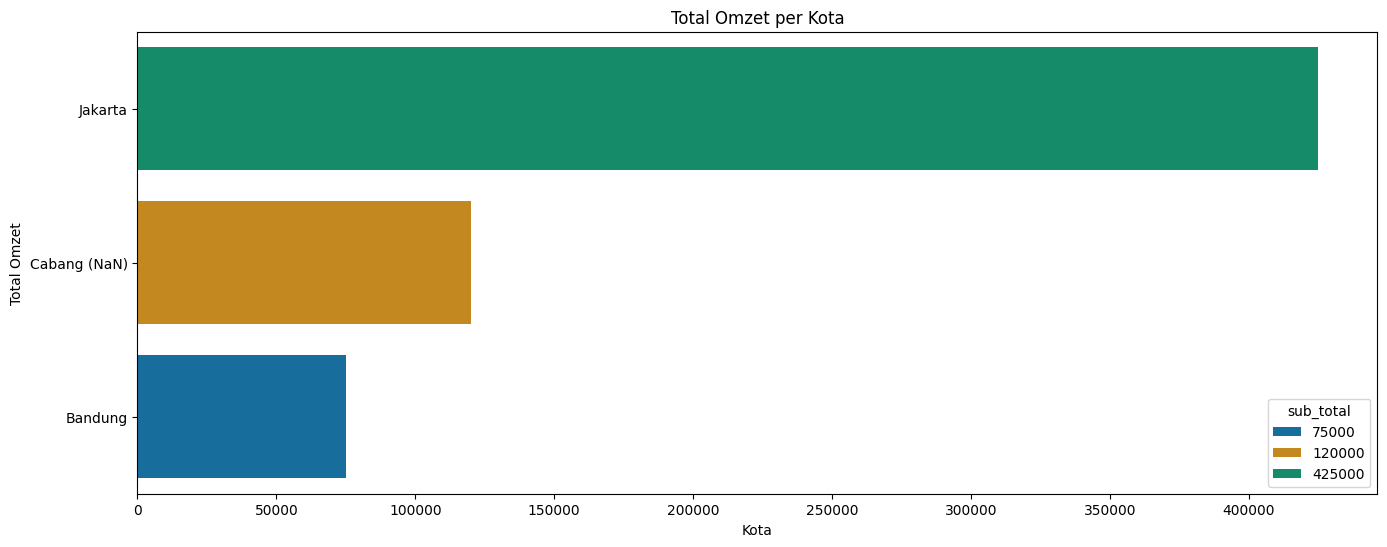

In [10]:
print(transaksi_perkota['kota'].unique())

omzet_perkota = transaksi_perkota.groupby('kota', dropna=False).agg({'sub_total':'sum'}).reset_index()
omzet_perkota = omzet_perkota.sort_values(by='sub_total', ascending=False)
print("\n--- Laporan Omzet per Kota ---")   
print(omzet_perkota)

# Ganti kategori NaN menjadi teks
omzet_perkota['kota'] = omzet_perkota['kota'].fillna('Cabang (NaN)')

import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(16,6))
sns.barplot(data=omzet_perkota, x='sub_total', y='kota', hue='sub_total', palette='colorblind')
plt.title('Total Omzet per Kota')
plt.xlabel('Kota')
plt.ylabel('Total Omzet')
plt.show()